# Set labels, descriptions and aliases in Spanish

This script has been made to set labels in Spanish for all the Wikidata properties without Spanish labels. Of course, making some changes it can be used to set labels in items and another languages.

#### First of all, we have to import the `pywikibot`, `csv` and `datetime` modules.

In [1]:
import pywikibot, csv, datetime, logging

#### Then, we have to set the project in which we are going to work, the CSV file and the summary edit.
Keep in mind this structure: `pywikibot.Site("lang", "project")`. Wikidata isn't separated in multilingual versions, so the options for `lang` are `test` and `wikidata`, so if you want to edit in Wikidata you have to use:
`site = pywikibot.Site("wikidata", "wikidata")`

In [4]:
test = input("Where do you want to edit? test or wikidata: ")
site = pywikibot.Site(test, "wikidata")
print(site)
file = "test.csv"
summary = [
    "setting es-label ([[User talk:CanaryBot|report a problem]])", 
    "setting es-desc ([[User talk:CanaryBot|report a problem]])",
    "setting es-alias ([[User talk:CanaryBot|report a problem]])"
]
time = str(datetime.datetime.now())
lang = "es"

Where do you want to edit? test or wikidata: wikidata
wikidata:wikidata


#### `with` statement, `for` loop and log file.

First of all, we have to open a `with` statement to open the file and then, we read it with `csv.DictReader`. `DictReader` will allow to check the rows by the header of the CSV, so the first line of the CSV is useful to organize and not for the data (e. g., `Property ID`, `es-label`).

This `for` loop will set the Spanish label of each property in the file (`propertyID = row["Property"]`). It is very important to keep the structure of the `propertyLabel` variable as `{u"es": row["Label"]}`, where the `row["Label"]` represent the column label of the file for its respective `propertyID`.

At the end, the it edit the item to set the Spanish label and the it open a log file to report what the script have done. The report is saved in the format of wikitable. In this new `with` we get again the `propertiesData`, to have the property with the Spanish label and write it in the log.

In [5]:
with open(file, "r") as csvFile:
    
    reader = csv.DictReader(csvFile)
    
    propertiesCount = 0
    labelsCount = 0
    descriptionsCount = 0
    aliasesCount = 0
    
    for row in reader:
        propertyID = row["Property"]
        propertyLabel = {u"es": row["Label"]}
        propertyDescription = {u"es": row["Description"]}
        aliases = str((row["Aliases"])).split(";")
        propertyAliases = {u"es": aliases}
        
        propertiesCount += 1
        
        propertyPage = pywikibot.PropertyPage(site, propertyID)
        propertyData = propertyPage.get()
                        
        # Check if the property has a label in Spanish
        try:
            propertyData["labels"]["es"]
            pywikibot.logging.output(propertyID + "\t| label is already in Spanish")
       
        # If not, catch the KeyError
        except KeyError:
            # Check if the CSV cell in the Label column is empty
            if any(row["Label"] in (None, "") for key in row):
                pywikibot.logging.output(propertyID + "\t| there isn't a label in Spanish, but it isn't in the CSV file")
            
            # If the cell is not empty, set the label in the property
            else:
                propertyPage.editLabels(propertyLabel, summary=summary[0])
                labelsCount += 1
                pywikibot.logging.output(propertyID + '\t| added "' + row["Label"] + '" label in Spanish')
        
        # Check if the property has a description in Spanish
        try:
            propertyData["descriptions"]["es"]
            pywikibot.logging.output(propertyID + "\t| description is already in Spanish" )
            
        # If not, catch the KeyError
        except KeyError:
            # Check if the CSV cell in the Description column is empty
            if any(row["Description"] in (None, "") for key in row):
                pywikibot.logging.output(propertyID + "\t| there isn't a description in Spanish, but it isn't in the CSV file")
            
            # If the cell is not empty, set the description in the property
            else:
                propertyPage.editDescriptions(propertyDescription, summary=summary[1])
                descriptionsCount += 1
                pywikibot.logging.output(propertyID + '\t| added "' + row["Description"] + '" description in Spanish')
                        
        # Check if the property has aliases in Spanish
        try:
            propertyData["aliases"]["es"]
            pywikibot.logging.output(propertyID + "\t| aliases are already in Spanish" )
            
            # Check if the CSV cell in the Aliases column is empty
            if any(row["Aliases"] in (None, "") for key in row):
                pywikibot.logging.output(propertyID + "\t| there isn't aliases in Spanish, but it isn't in the CSV file")
            
            # If the cell is not empty, set the description in the property
            else:
                propertyAliases = {u"es": aliases + propertyData["aliases"]["es"]}
                propertyPage.editAliases(propertyAliases, summary=summary[2])
                aliasesCount += len(propertyAliases["es"])
                pywikibot.logging.output(propertyID + '\t| added ' + str(aliases).lstrip("[").rstrip("]") + ' additional aliases in Spanish')
            
        # If the property hasn't aliases, catch the KeyError
        except KeyError:
            # Check if the CSV cell in the Description column is empty
            if any(row["Aliases"] in (None, "") for key in row):
                pywikibot.logging.output(propertyID + "\t| there isn't aliases in Spanish, but it isn't in the CSV file")
            
            # If the cell is not empty, set the description in the property
            else:
                propertyPage.editAliases(propertyAliases, summary=summary[2])
                aliasesCount += len(propertyAliases["es"])
                pywikibot.logging.output(propertyID + '\t| added ' + str(aliases).lstrip("[").rstrip("]") + ' aliases in Spanish')
            
        logging.basicConfig(filename='logs/setPropertyLabelsDescsAliases.log', level=logging.INFO, format='* %(asctime)s » %(message)s', datefmt='%d/%m/%Y %I:%M:%S %p')
        

P1006	| label is already in Spanish
P1006	| added "identificador de la Biblioteca Real Neerlandesa para autores" description in Spanish
P1006	| added 'identificador de la Biblioteca Real Neerlandesa', 'identificador de la Biblioteca Nacional de los Países Bajos', 'ID NTA' aliases in Spanish
P1010	| added "identificador de estadísticas de Irán" label in Spanish
P1010	| added "identificador para lugares en Irán" description in Spanish
P1010	| added 'identificador estadístico de Irán', 'lugar Irán', 'lugares Irán' aliases in Spanish
P1022	| label is already in Spanish
P1022	| added "clasificación española de ocupaciones mantenida por el Instituto Nacional de Estadística de España" description in Spanish
P1022	| added 'identificador CNO-11', 'código CNO-11', 'ID CNO-11', 'CNO-11' aliases in Spanish
P1025	| label is already in Spanish
P1025	| added "identificador para ediciones en el Système Universitaire de Documentation (SUDOC)" description in Spanish
P1025	| aliases are already in Spanis

#### Then we can get some statistics of the process

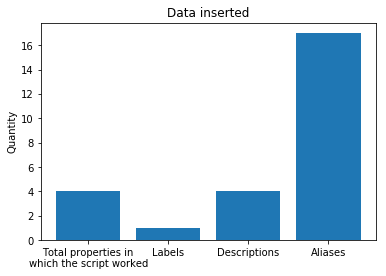

In [7]:
import numpy as npy
import matplotlib.pyplot as plt

# Tags for the barchart
tags = ("Total properties in\nwhich the script worked", "Labels", "Descriptions", "Aliases")
# We need to know how many tags to configure the y-axis
yPos = npy.arange(len(tags))
# We get the data from the variables we use to count how many times we add something to a property
data = [propertiesCount, labelsCount, descriptionsCount, aliasesCount]

# Configuring the barchart
plt.bar(yPos, data, align="center")
plt.xticks(yPos, tags)
plt.ylabel("Quantity")
plt.title("Data inserted")

# And after the magic powders...
# Magic!
plt.show()

# Finally, the script print the stats.
stats = "Properties\t:\t" + str(propertiesCount) + "\n\nLabels\t\t:\t" + str(labelsCount) + "\n\nDescriptions\t:\t" + str(descriptionsCount) + "\n\nAliases\t\t:\t" + str(aliasesCount) + "\n\n-----------------------------" + "\n\nTotal changes\t:\t" + str(propertiesCount + labelsCount + descriptionsCount + aliasesCount)

#### Finally, we execute this little piece of code to close the table. Then, we can copy the log to a wiki userpage to make it public.

In [8]:
# logPage is where the log is going to be saved.
# We can make this or use an input to write the name of the destination page
logPage = pywikibot.Page(site, u"User:CanaryBot/logs/Task 2 test: Set property labels, descriptions and aliases")

# Open, read and copy the log to the logPage
with open("logs/setPropertyLabelsDescsAliases.log", "r") as logFile:
    content = logFile.read()
    logPage.text = u"""{}\n\n-------\n\n{}""".format(stats, content)
    logPage.save(summary="log and stats (without graph) saved")

print("Log saved succesfully!")

Log saved succesfully!


Page [[wikidata:User:CanaryBot/logs/Task 2 test: Set property labels, descriptions and aliases]] saved
